In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [67]:
df=pd.read_csv('LHSfinallysuoyou2daimianji(1).csv')
print(df.columns)
train_cols=df.columns.drop(['tanpaifang'])

Index(['n', 'f', 'w', 'r', 'd0', 's', 'tanpaifang'], dtype='object')


In [68]:
df2=df[train_cols]
scaler=MinMaxScaler()
df2=scaler.fit_transform(df2)

scaler2=MinMaxScaler()
y_scaled=scaler2.fit_transform(df['tanpaifang'].values.reshape(-1,1))
x_train,x_test,y_train,y_test=train_test_split(df2,y_scaled,random_state=1,shuffle=True,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(308, 6)
(77, 6)


In [115]:
model=MLPRegressor(
    hidden_layer_sizes=(512,256),
    solver='adam',
    batch_size=16,
    max_iter=2000,
    activation='relu',
    learning_rate_init=0.0005
)
print('Train BP Neural Network..')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
loss=model.loss_curve_

Train BP Neural Network..


D:\Anacoda\anaconda\envs\NLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score: 0.9324256598247146
MSE: 0.002638247720640848


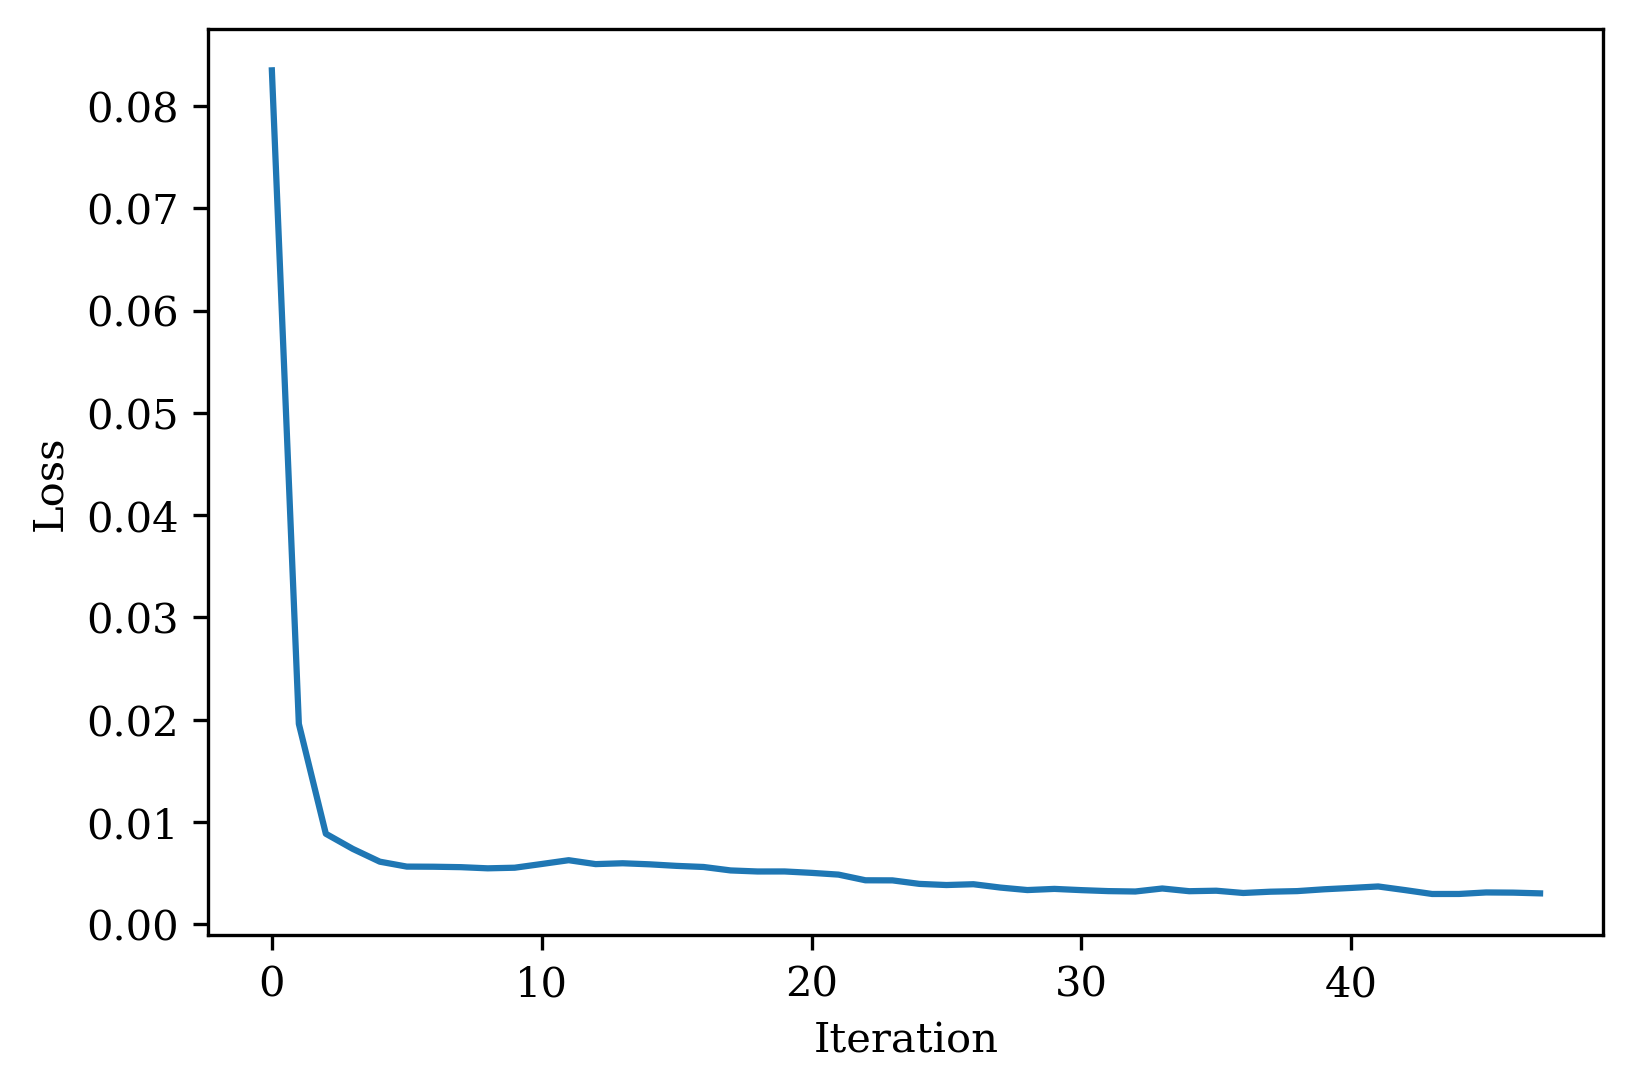

In [110]:
plt.rcParams['font.family']='serif'
plt.figure(dpi=300)
plt.plot(range(len(loss)),loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.savefig('Loss_curve.jpg')

In [122]:
Real_Pred=scaler2.inverse_transform(pred.reshape(-1,1))
Real_Value=scaler2.inverse_transform(y_test)


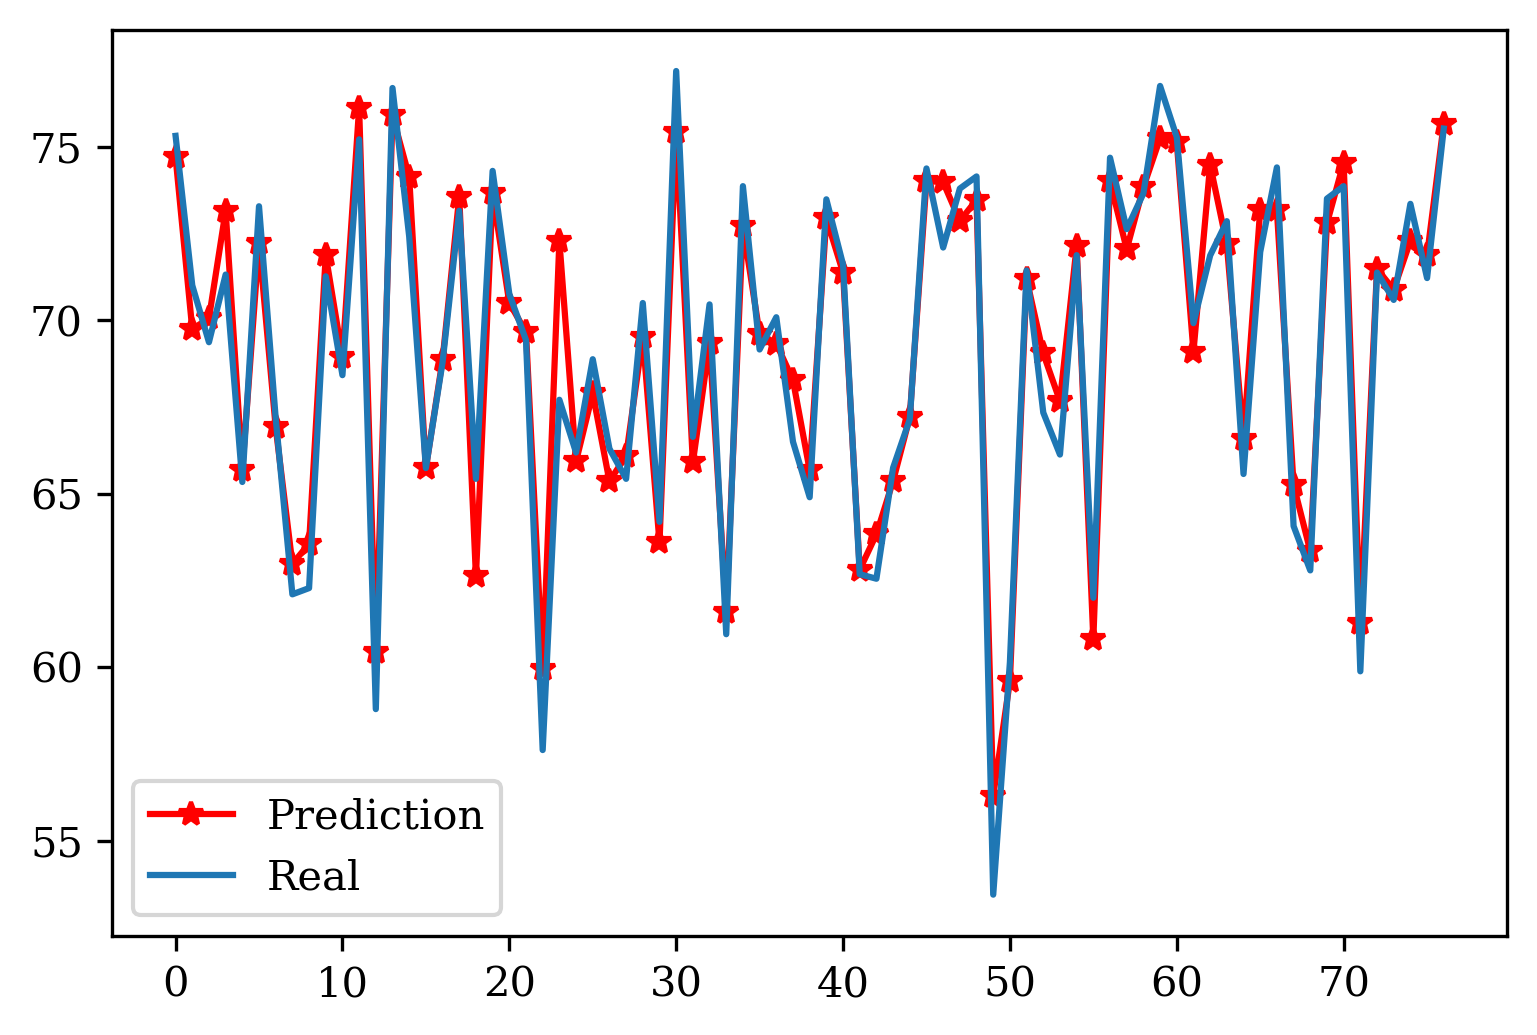

In [127]:
plt.figure(dpi=300)
plt.plot(range(len(Real_Pred)),Real_Pred,label='Prediction',marker='*',c='r')
plt.plot(range(len(Real_Value)),Real_Value,label='Real')
plt.legend()
plt.savefig('Prediction.jpg')

In [120]:
model2=RandomForestRegressor(
    n_estimators=1000
)
print('Train Random Forest Model..')
model2.fit(x_train,y_train)

Train Random Forest Model..


C:\Users\Bingbing\AppData\Local\Temp/ipykernel_12020/2588839423.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000)

In [121]:
pred=model2.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('MSE Score:',mean_squared_error(y_test,pred))

R2 Score: 0.9431218189381152
MSE Score: 0.0022206466411875893
